<a href="https://colab.research.google.com/github/JOAOPESSANHA/FIAP_POS_IA_/blob/main/Carlos_Challenge2_Corr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aptidão máxima da população atingida na geração 98

Melhor Deputado Encontrado:
Deputado(Ficha Limpa: 1, Educação: 5, Experiência: 20, Transparência: 5, Popularidade: 100)


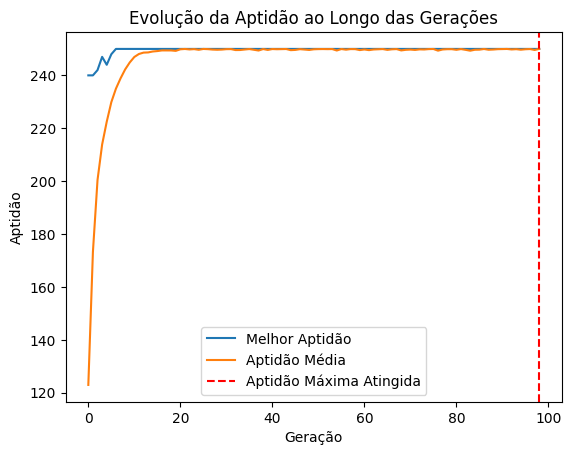

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt


# Definição das características dos deputados
class Deputado:
  def __init__(self, ficha_limpa, educacao, experiencia, transparencia, popularidade):
    self.ficha_limpa = ficha_limpa
    self.educacao = educacao
    self.experiencia = experiencia
    self.transparencia = transparencia
    self.popularidade = popularidade

  def __repr__(self):
    return (f"Deputado(Ficha Limpa: {self.ficha_limpa}, Educação: {self.educacao}, "
            f"Experiência: {self.experiencia}, Transparência: {self.transparencia}, "
            f"Popularidade: {self.popularidade})")

# Parâmetros do algoritmo genético
population_size = 513
#num_generations = 40 # Aumentando o número de gerações para maior garantia de convergência
num_generations = 1000
mutation_rate = 0.01

# Função de aptidão
def calculate_fitness(deputado):
  fitness = (deputado.ficha_limpa * 5 +
             deputado.educacao * 2 +
             deputado.experiencia +
             deputado.transparencia * 3 +
             deputado.popularidade * 2)
  return fitness

# Geração de uma população inicial aleatória
def generate_random_population(population_size):
  population = []
  for _ in range(population_size):
    ficha_limpa = random.randint(0, 1)
    educacao = random.randint(0, 5)
    experiencia = random.randint(0, 20)
    transparencia = random.randint(0, 5)
    popularidade = random.randint(0, 100)
    deputado = Deputado(ficha_limpa, educacao, experiencia, transparencia, popularidade)
    population.append(deputado)
  return population

# Cruzamento de dois deputados
def crossover(parent1, parent2):
  #crossover_point = random.randint(1, 4)
  crossover_point = random.randint(0, 4)
  child1_attrs = list(parent1.__dict__.values())[:crossover_point] + list(parent2.__dict__.values())[crossover_point:]
  child2_attrs = list(parent2.__dict__.values())[:crossover_point] + list(parent1.__dict__.values())[crossover_point:]
  return Deputado(*child1_attrs), Deputado(*child2_attrs)

# Mutação de um deputado
"""def mutate(deputado):
  attrs = list(deputado.__dict__.keys())
  attr_to_mutate = random.choice(attrs)
  if attr_to_mutate == 'ficha_limpa':
    deputado.ficha_limpa = 1 - deputado.ficha_limpa
  else:
    setattr(deputado, attr_to_mutate, random.randint(0, 10))
  return deputado"""

def mutate(deputado):
  attrs = list(deputado.__dict__.keys())
  attr_to_mutate = random.choice(attrs)
  if attr_to_mutate == 'ficha_limpa':
    deputado.ficha_limpa = 1 - deputado.ficha_limpa
  elif attr_to_mutate == 'educacao' or attr_to_mutate == 'transparencia':
    setattr(deputado, attr_to_mutate, random.randint(0, 5))
  elif attr_to_mutate == 'experiencia':
    setattr(deputado, attr_to_mutate, random.randint(0, 20))
  elif attr_to_mutate == 'popularidade':
    setattr(deputado, attr_to_mutate, random.randint(0, 100))
  return deputado

def plot_evolution(best_fitness_values, mean_fitness_values, generation_reached_max_fitness):
  generations = list(range(len(best_fitness_values)))
  plt.plot(generations, best_fitness_values, label='Melhor Aptidão')
  plt.plot(generations, mean_fitness_values, label='Aptidão Média')
  if generation_reached_max_fitness is not None:
    plt.axvline(x=generation_reached_max_fitness, color='red', linestyle='--', label='Aptidão Máxima Atingida')
  plt.xlabel('Geração')
  plt.ylabel('Aptidão')
  plt.title('Evolução da Aptidão ao Longo das Gerações')
  plt.legend()
  plt.show()

if __name__ == '__main__':
  population = generate_random_population(population_size)
  best_fitness_values = []
  mean_fitness_values = []
  max_fitness = 250
  generation_reached_max_fitness = None

  for generation in range(num_generations):
    population = sorted(population, key=calculate_fitness, reverse=True)
    best_fitness = calculate_fitness(population[0])
    mean_fitness = np.mean([calculate_fitness(deputado) for deputado in population])
    best_fitness_values.append(best_fitness)
    mean_fitness_values.append(mean_fitness)

   # if best_fitness >= max_fitness and generation_reached_max_fitness is None: #Original
    if mean_fitness_values[generation] >= max_fitness and generation_reached_max_fitness is None:
      generation_reached_max_fitness = generation
      print(f"Aptidão máxima da população atingida na geração {generation}")
      break

    # Seleção dos pais (elitismo)
    parents = population[:population_size // 2]


    # Criação de nova geração
    new_population = []
    for _ in range(population_size // 2):

      parent1 = random.choice(parents)
      parent2 = random.choice(parents)
      child1, child2 = crossover(parent1, parent2)

      # Mutação
      if random.random() < mutation_rate:
        child1 = mutate(child1)
      if random.random() < mutation_rate:
        child2 = mutate(child2)

      new_population.extend([child1, child2])

    population = new_population

  # Imprime o melhor deputado encontrado
  best_deputado = population[0]
  print("\nMelhor Deputado Encontrado:")
  print(best_deputado)

  # Plota a evolução da aptidão
  plot_evolution(best_fitness_values, mean_fitness_values, generation_reached_max_fitness)
